In [56]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [57]:
X=pd.read_csv("Linear_X_Train.csv")
X

x
0    -0.289307
1    -0.588810
2     1.027507
3    -0.259013
4     0.782043
...        ...
3745 -0.100992
3746  1.349197
3747 -0.305164
3748  1.675833
3749 -0.491757

[3750 rows x 1 columns]

In [58]:
Y=pd.read_csv("Linear_Y_Train.csv")
Y

y
0      -0.091101
1     -53.467721
2      75.457009
3     -12.025286
4      57.414187
...          ...
3745  -13.530595
3746  114.741657
3747  -34.983275
3748  145.206092
3749  -17.124494

[3750 rows x 1 columns]

In [59]:
X=X.values
Y=Y.values

print(X.shape)
print(Y.shape)

(3750, 1)
(3750, 1)


## Normalization

In [60]:
X_mean=X.mean()
X_std=X.std()
X_norm=(X-X_mean)/X_std

In [61]:
X_norm

array([[-0.25352061],
       [-0.55541377],
       [ 1.07380656],
       ...,
       [-0.26950343],
       [ 1.72730762],
       [-0.4575866 ]])

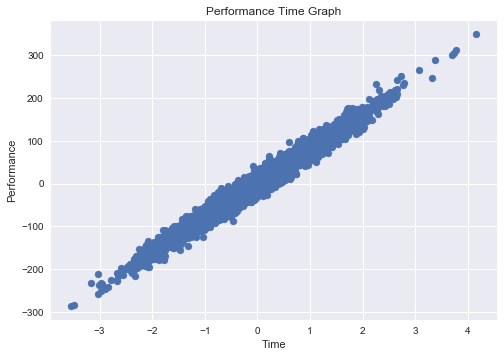

In [62]:
plt.style.use("seaborn")
plt.scatter(X_norm,Y)
plt.title("Performance Time Graph")
plt.ylabel("Performance")
plt.xlabel("Time")
plt.show()

### Splittting

In [63]:
from sklearn import model_selection as ms

X_train,X_test,Y_train,Y_test=ms.train_test_split(X_norm,Y,random_state=0)

## Section 2 - LR

In [64]:
#Common menthods

def predict(X,m,c):
    return X*m+c

def score(Yo,Yp):
    n=np.sum((Yo-Yp)**2)
    d=np.sum((Yo-Yo.mean())**2)
    return (1-(n/d))*100

def cost(Yo,Yp):
    s=np.sum((Yo-Yp)**2)
    return s/Yo.shape[0]

In [65]:
# LR

def mc(X,Y):
    n=(X*Y).mean()-Y.mean()*X.mean()
    d=(X**2).mean()-(X.mean()**2)
    m=n/d
    c=Y.mean()-m*X.mean()
    return m,c

In [66]:
m,c=mc(X_train,Y_train)
Y_pred=predict(X_test,m,c)

print("m,c values ",m,c)
print("score: ",score(Y_test,Y_pred))
print("cost: ",cost(Y_test,Y_pred))

m,c values  80.09246799931846 0.6420801468162705
score:  96.98692716375388
cost:  191.9884993017348


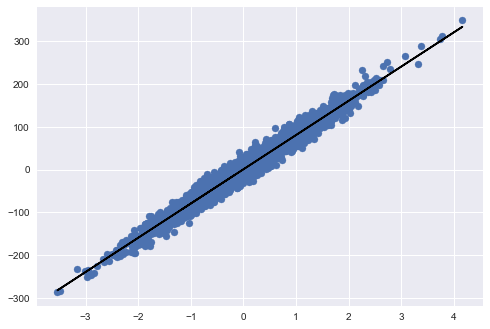

In [67]:
#Visualisation

Y_pred=predict(X_train,m,c)

plt.scatter(X_train,Y_train)
plt.plot(X_train,Y_pred,color="black")
plt.show()

In [68]:
# GD

def step_grad(X,Y,m,c,lr):
    m_slope=0
    c_slope=0
    M=X.shape[0]
    
    for i in range(M):
        x=X[i,0]
        y=Y[i,0]
        m_slope+=(-2/M)*(y-m*x-c)*(x)
        c_slope+=(-2/M)*(y-m*x-c)
    
    new_m=m-lr*m_slope
    new_c=c-lr*c_slope
    
    return new_m,new_c
    

def gradient_descent(X,Y,lr=0.1,iterations=20):
    m=0
    c=0
    for i in range(iterations):
        m,c=step_grad(X,Y,m,c,lr)
        Y_pred=predict(X,m,c)
        print("cost ",cost(Y,Y_pred))
        
    return m,c

In [69]:
m,c=gradient_descent(X_train,Y_train,0.1,50)
print(m,c)
Y_pred=predict(X_test,m,c)
print("score ",score(Y_test,Y_pred))
# print("cost ",cost(Y_test,Y_pred))

cost  4308.665581503205
cost  2818.238308232608
cost  1867.2493150954792
cost  1260.4536447752962
cost  873.2746884381971
cost  626.2255680227336
cost  468.5889235261515
cost  368.0038908904385
cost  303.82209616392754
cost  262.868440277728
cost  236.73624908361194
cost  220.06142293018758
cost  209.42123871280077
cost  202.63171466359162
cost  198.29928148268786
cost  195.53471663766692
cost  193.77061313888305
cost  192.64491040484486
cost  191.9265774900211
cost  191.46819269229772
cost  191.17568516593113
cost  190.98902730198424
cost  190.8699146341103
cost  190.79390440642788
cost  190.7453991792845
cost  190.7144458415288
cost  190.69469303216718
cost  190.68208774609005
cost  190.6740436176561
cost  190.66891018643267
cost  190.66563422357802
cost  190.66354361530014
cost  190.66220945244424
cost  190.66135802525494
cost  190.66081466398333
cost  190.6604679013042
cost  190.66024660277435
cost  190.66010537268792
cost  190.6600152408049
cost  190.65995771904107
cost  190.65992

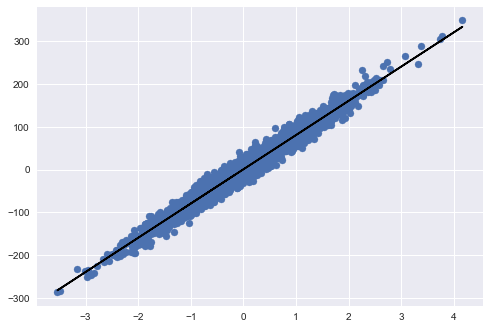

In [70]:
#Visualisation

Y_pred=predict(X_train,m,c)

plt.scatter(X_train,Y_train)
plt.plot(X_train,Y_pred,color="black")
plt.show()

In [54]:
#Another way of calculting GD

def hypothesis(x,theta):
    #theta= [theta0 theta1] => [c m]
    yp=theta[0]+theta[1]*x
    return yp

def gradient(X,Y,theta):
    m=X.shape[0]
    grad=np.zeros((2,),dtype='float64')
    for i in range(m):
        x=X[i]
        y=Y[i]
        yp=hypothesis(x,grad)
        grad[0]+=(yp-y)
        grad[1]+=(yp-y)*x
    
    return grad/m

def error(X,Y,theta):
    m=X.shape[0]
    total=0.0
    for i in range(m):
        yp=hypothesis(X[i],theta)
        total+=(yp-Y[i])**2
        
    return total/m
        
    

def gradient_descent2(X,Y,lr=0.01,iterations=20):
    theta=np.zeros((2,),dtype='float64')
    error_list=[]
    
    for i in range(iterations):
#         e=error(X,Y,theta)
#         error_list.append(e)
        
        grad=gradient(X,Y,theta)
        theta[0]=theta[0]-lr*grad[0]
        theta[1]=theta[1]-lr*grad[1]
        
    return theta,error_list

In [55]:
theta,error_list=gradient_descent2(X_train,Y_train)

C:\Users\manja\anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: overflow encountered in add
  from ipykernel import kernelapp as app
C:\Users\manja\anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in add
  """


In [21]:
theta

array([nan, nan])

In [26]:
X_train[0]

array([-0.17636114])

# Visualizing Loss Function, Gradient Descent and Theta updates

In [ ]:
theta=gradient_descent(X_train,Y_train,0.1,50)

In [ ]:
theta[0],theta[1]

## Assignment Prediction

In [ ]:
X_test=pd.read_csv("Linear_X_test.csv")
X_test

In [ ]:
X_test=X_test.values

#Normalisation
X_test=(X_test-X_test.mean())/X_test.std()

In [ ]:
m,c=gradient_descent(X_norm,Y,0.2,50)

In [ ]:
Y_pred=predict(X_test,m,c)

In [ ]:
#Visualization

plt.scatter(X_norm,Y)
plt.plot(X_test,Y_pred,color="red")
plt.show()

In [ ]:
df=pd.DataFrame(Y_pred)
df.columns=["y"]
df

In [ ]:
df.to_csv("hard_work.csv",index=False)